<a href="https://colab.research.google.com/github/farouk1907/Code/blob/main/Soft_Computing_ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best distance: 12
Best path: [2, 3, 1, 0, 2]


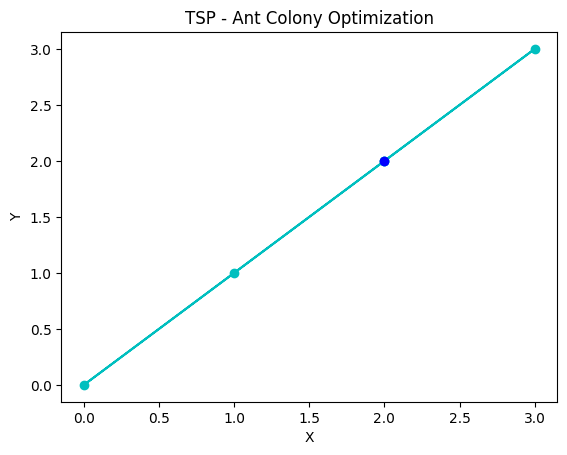

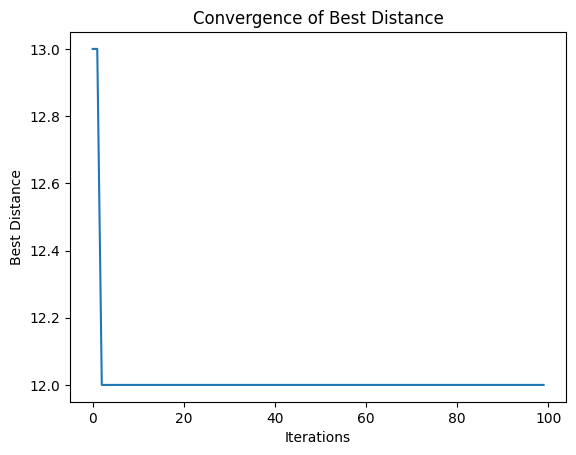

In [42]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

class AntColonyTSP:
    def __init__(self, distances, n_ants, n_iterations, decay=0.5, alpha=1, beta=5, rho=0.5):
        self.distances = distances
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.n_cities = distances.shape[0]
        self.pheromone = np.ones((self.n_cities, self.n_cities))

    def run(self):
        best_distances = []
        best_distance = float('inf')
        best_path = None
        for iteration in range(self.n_iterations):
            paths = self.construct_paths()
            self.update_pheromone(paths)
            distances = [self.calculate_distance(path) for path in paths]
            min_distance = min(distances)
            if min_distance < best_distance:
                best_distance = min_distance
                best_path = paths[np.argmin(distances)]
            best_distances.append(best_distance)
        return best_distance, best_path, best_distances

    def construct_paths(self):
        paths = []
        for _ in range(self.n_ants):
            path = self.construct_path()
            paths.append(path)
        return paths

    def construct_path(self):
        path = []
        visited = np.zeros(self.n_cities, dtype=bool)
        current_city = np.random.randint(self.n_cities)
        visited[current_city] = True
        path.append(current_city)
        for _ in range(self.n_cities - 1):
            next_city = self.choose_next_city(current_city, visited)
            visited[next_city] = True
            path.append(next_city)
            current_city = next_city
        path.append(path[0])  # Return to the starting city
        return path

    def choose_next_city(self, current_city, visited):
        pheromone = self.pheromone[current_city]
        visibility = np.where(self.distances[current_city] != 0, 1.0 / self.distances[current_city], 0)
        probabilities = pheromone ** self.alpha * visibility ** self.beta
        probabilities[visited] = 0
        probabilities /= np.sum(probabilities)
        next_city = np.random.choice(range(self.n_cities), p=probabilities)
        return next_city

    def update_pheromone(self, paths):
        self.pheromone *= self.decay
        for path in paths:
            for i in range(self.n_cities):
                city_i = path[i]
                city_j = path[i + 1]
                self.pheromone[city_i, city_j] += 1.0 / self.calculate_distance(path)

    def calculate_distance(self, path):
        distance = 0
        for i in range(self.n_cities - 1):
            city_i = path[i]
            city_j = path[i + 1]
            distance += self.distances[city_i, city_j]
        return distance

    def plot_path(self, path):
        x = []
        y = []
        for city in path:
            x.append(city)
            y.append(city)
        plt.plot(x, y, 'co-')
        plt.plot(x[0], y[0], 'bo')  # Starting city
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('TSP - Ant Colony Optimization')
        plt.show()

    def plot_convergence(self, best_distances):
        plt.plot(range(len(best_distances)), best_distances)
        plt.xlabel('Iterations')
        plt.ylabel('Best Distance')
        plt.title('Convergence of Best Distance')
        plt.show()

# Suppress the RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Example usage
distances = np.array([[0, 2, 9, 10],
                      [1, 0, 6, 4],
                      [15, 7, 0, 8],
                      [6, 3, 12, 0]])

ant_colony = AntColonyTSP(distances, n_ants=10, n_iterations=100)
best_distance, best_path, best_distances = ant_colony.run()
print("Best distance:", best_distance)
print("Best path:", best_path)

ant_colony.plot_path(best_path)
ant_colony.plot_convergence(best_distances)
